In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

import pydot
    

sns.set_style('darkgrid')
sns.set_context(context='notebook', font_scale=1.5)

In [2]:
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    mae = history.history['mae']
    val_mae = history.history['val_mae']
    
    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize = (20, 7))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = mae, label='Training Mean Absolute Error', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_mae, label='Validation Mean Absolute Error', ax=ax[1])
    ax2.set(title = 'Mean Absolute Error', xlabel = 'Epochs')
    

In [3]:
df = datasets.fetch_california_housing()

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
description = print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
df = pd.DataFrame(df.data, columns=df.feature_names)

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [9]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [10]:
df.duplicated().sum()

0

## EDA

### Univariate statistical analysis

Text(0.5, 0, 'Median Income in Block Group')

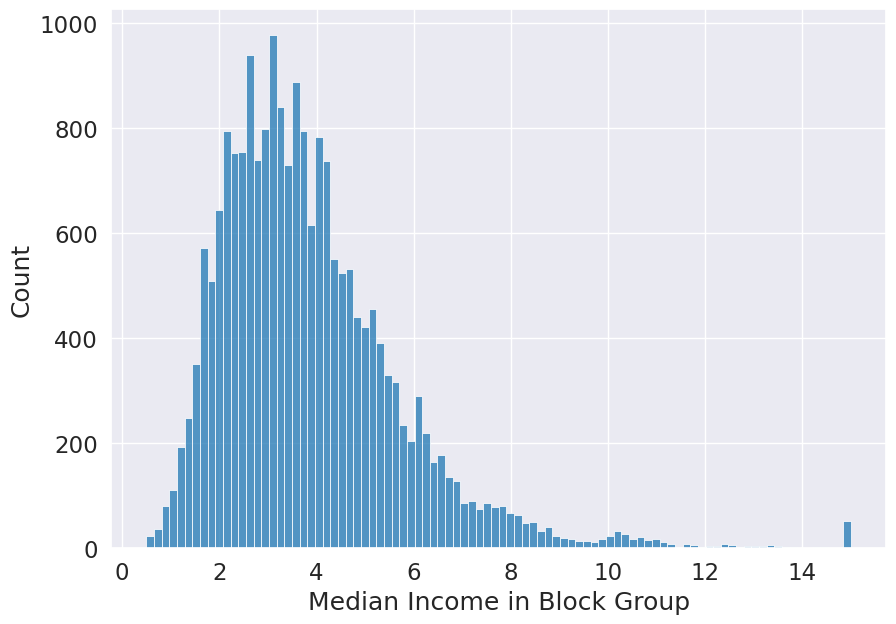

In [11]:
plt.figure(figsize=(10, 7))
sns.histplot(x=df['MedInc'])
plt.xlabel('Median Income in Block Group')

Text(0.5, 0, 'House Age')

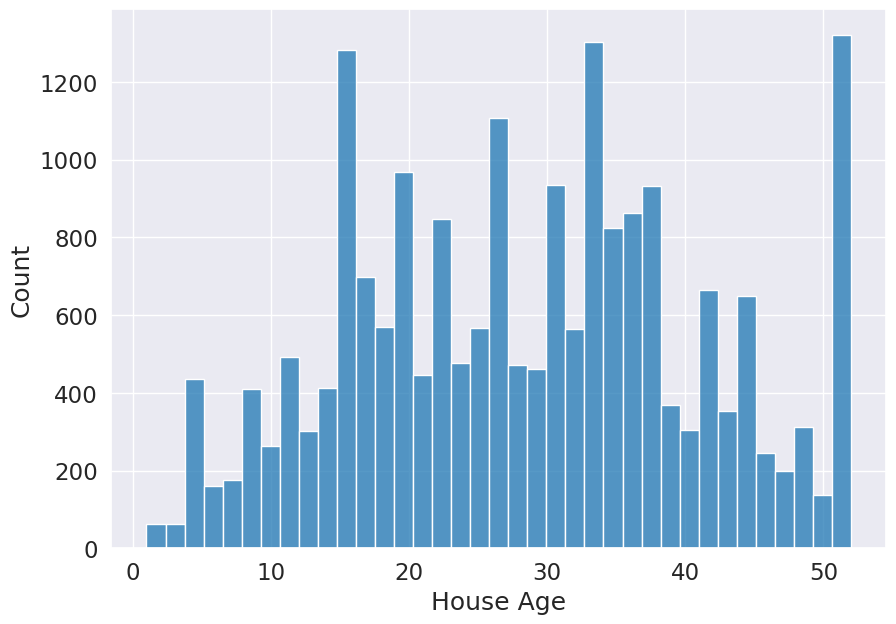

In [12]:
plt.figure(figsize=(10, 7))
sns.histplot(x=df['HouseAge'])
plt.xlabel('House Age')

Text(0.5, 0, 'Median Bedrooms')

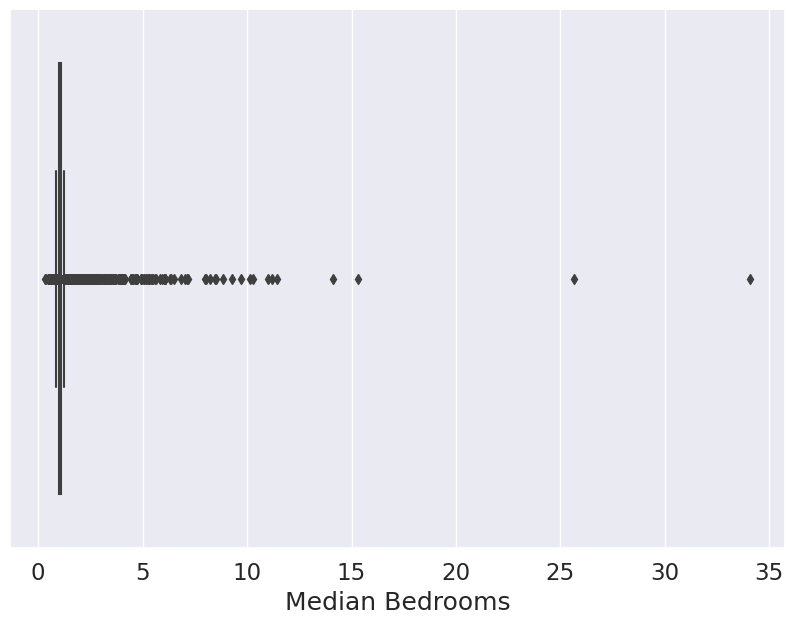

In [13]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=df['AveBedrms'])
plt.xlabel('Median Bedrooms')

Text(0.5, 0, 'Average Number of Household Members')

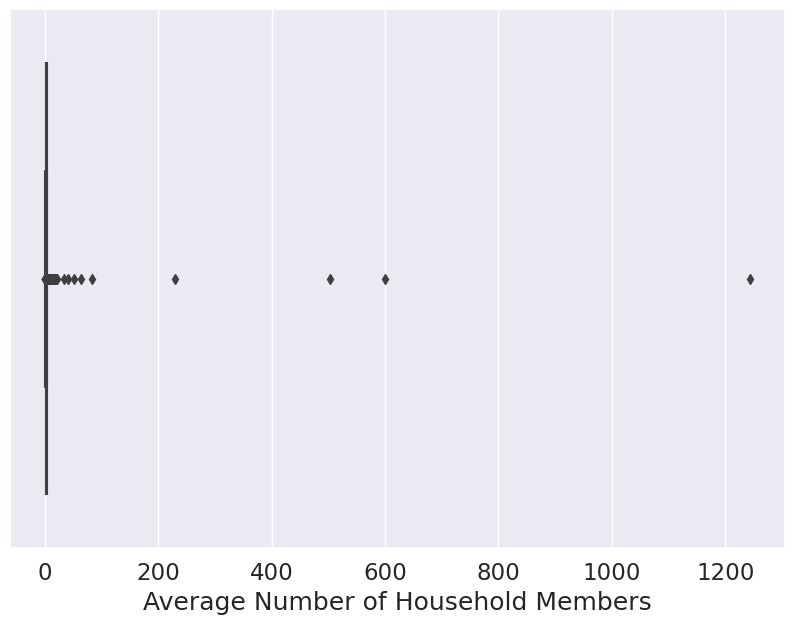

In [14]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=df['AveOccup'])
plt.xlabel('Average Number of Household Members')

Text(0.5, 0, 'Block Group Population')

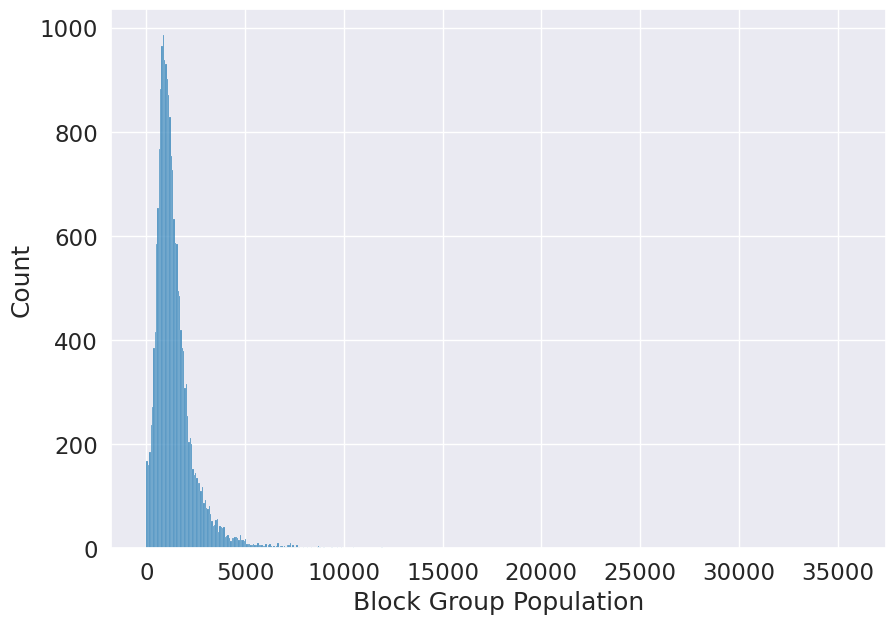

In [15]:
plt.figure(figsize=(10, 7))
sns.histplot(x=df['Population'])
plt.xlabel('Block Group Population')

Text(0.5, 0, 'Average Rooms')

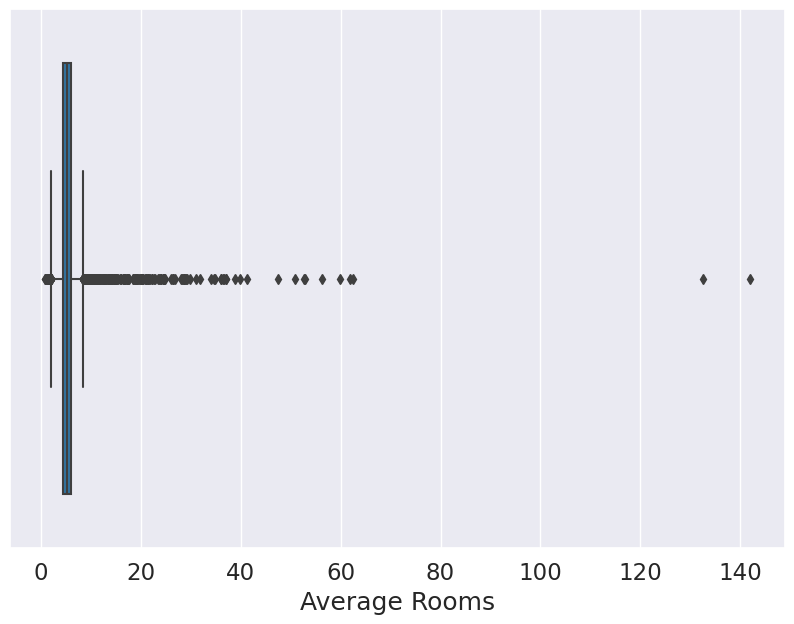

In [16]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=df['AveRooms'])
plt.xlabel('Average Rooms')

### Multivariate statistical analysis

<Axes: xlabel='Longitude', ylabel='Latitude'>

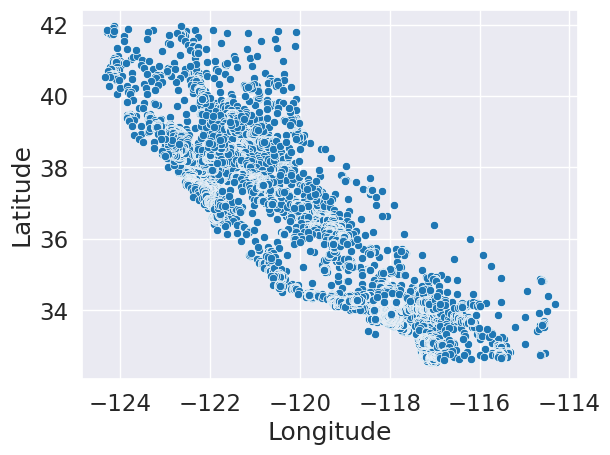

In [17]:
sns.scatterplot(x=df['Longitude'], y=df['Latitude'])

In [18]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

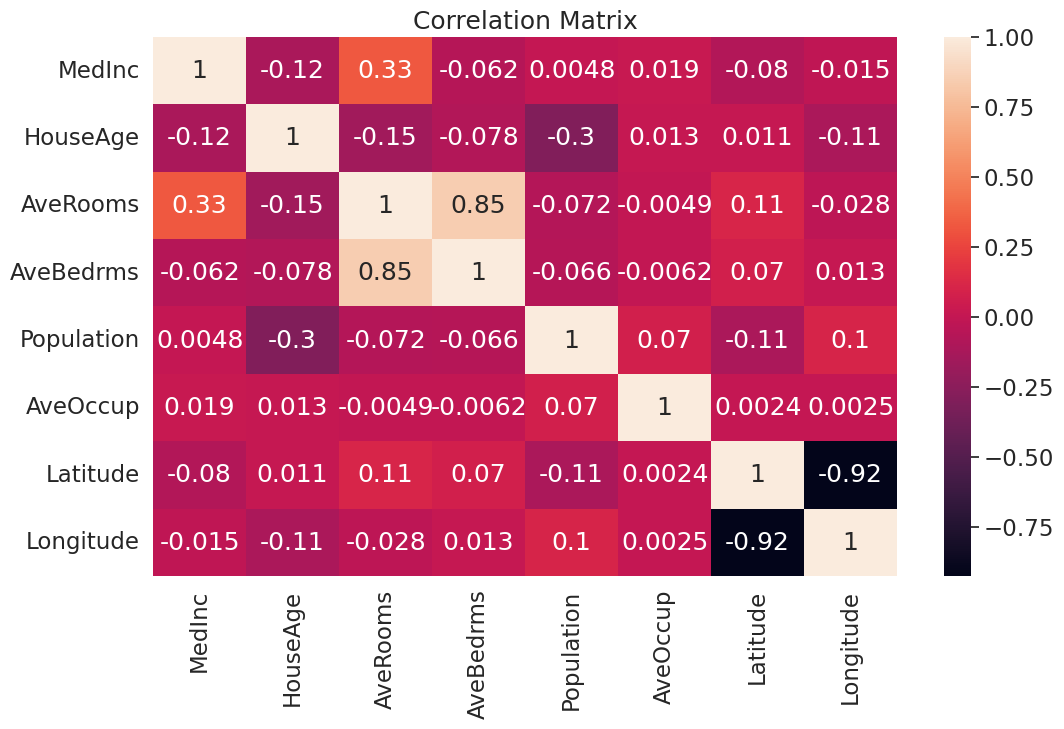

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')

### Build a model

In [20]:
X = df.drop(columns=['MedInc'])
y = df['MedInc']
X_train = X.sample(frac=.7, random_state=0)
y_train = y.sample(frac=.7, random_state=0)
X_test = X.drop(X_train.index)
y_test = y.drop(y_train.index)

In [25]:
X_train.shape[1]

7

In [28]:
def build_model():
    
    inputs = keras.Input(X_train.shape[1])
    
    x = Dense(300, activation=tf.nn.relu)(inputs)
    
    x = Dense(300, activation=tf.nn.relu)(x)
    
    x = Dense(300, activation=tf.nn.relu)(x)
    
    outputs = Dense(1)(x)
    
    return keras.Model(inputs, outputs)

In [29]:
model = build_model()

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss=['mse'],
               metrics=['mae'])

In [50]:
history = model.fit(X_train, y_train, epochs=100, validation_split=.2, verbose=1)

Epoch 1/100


2023-12-29 22:38:43.567705: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-29 22:38:43.862291: I external/local_xla/xla/service/service.cc:168] XLA service 0xa6de970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-29 22:38:43.862315: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-12-29 22:38:43.867554: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-29 22:38:43.883733: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1703900323.936979   20269 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


362/362 [==============================] - 2s 3ms/step - loss: 515.5882 - mae: 5.9015 - val_loss: 4.5578 - val_mae: 1.6989
Epoch 2/100
362/362 [==============================] - 1s 3ms/step - loss: 4.5504 - mae: 1.5444 - val_loss: 4.5656 - val_mae: 1.6637
Epoch 3/100
362/362 [==============================] - 1s 3ms/step - loss: 4.0909 - mae: 1.4952 - val_loss: 4.0849 - val_mae: 1.5967
Epoch 4/100
362/362 [==============================] - 1s 2ms/step - loss: 5.9187 - mae: 1.6809 - val_loss: 5.3434 - val_mae: 1.9082
Epoch 5/100
362/362 [==============================] - 1s 2ms/step - loss: 7.1565 - mae: 1.7807 - val_loss: 5.9150 - val_mae: 1.8925
Epoch 6/100
362/362 [==============================] - 1s 3ms/step - loss: 8.4732 - mae: 1.8842 - val_loss: 3.3293 - val_mae: 1.3061
Epoch 7/100
362/362 [==============================] - 1s 3ms/step - loss: 3.5573 - mae: 1.3890 - val_loss: 4.8394 - val_mae: 1.5358
Epoch 8/100
362/362 [==============================] - 1s 2ms/step - loss: 3.46

362/362 [==============================] - 1s 3ms/step - loss: 1.9453 - mae: 1.0145 - val_loss: 1.9119 - val_mae: 1.0463
Epoch 63/100
362/362 [==============================] - 1s 3ms/step - loss: 1.8088 - mae: 0.9818 - val_loss: 1.5596 - val_mae: 0.9232
Epoch 64/100
362/362 [==============================] - 1s 3ms/step - loss: 1.7722 - mae: 0.9812 - val_loss: 1.9675 - val_mae: 0.9793
Epoch 65/100
362/362 [==============================] - 1s 3ms/step - loss: 1.8829 - mae: 1.0031 - val_loss: 1.5154 - val_mae: 0.9012
Epoch 66/100
362/362 [==============================] - 1s 3ms/step - loss: 1.8155 - mae: 0.9913 - val_loss: 1.8203 - val_mae: 0.9865
Epoch 67/100
362/362 [==============================] - 1s 3ms/step - loss: 1.9644 - mae: 1.0191 - val_loss: 1.6366 - val_mae: 0.9425
Epoch 68/100
362/362 [==============================] - 1s 3ms/step - loss: 1.7894 - mae: 0.9836 - val_loss: 1.5134 - val_mae: 0.9138
Epoch 69/100
362/362 [==============================] - 1s 3ms/step - loss:

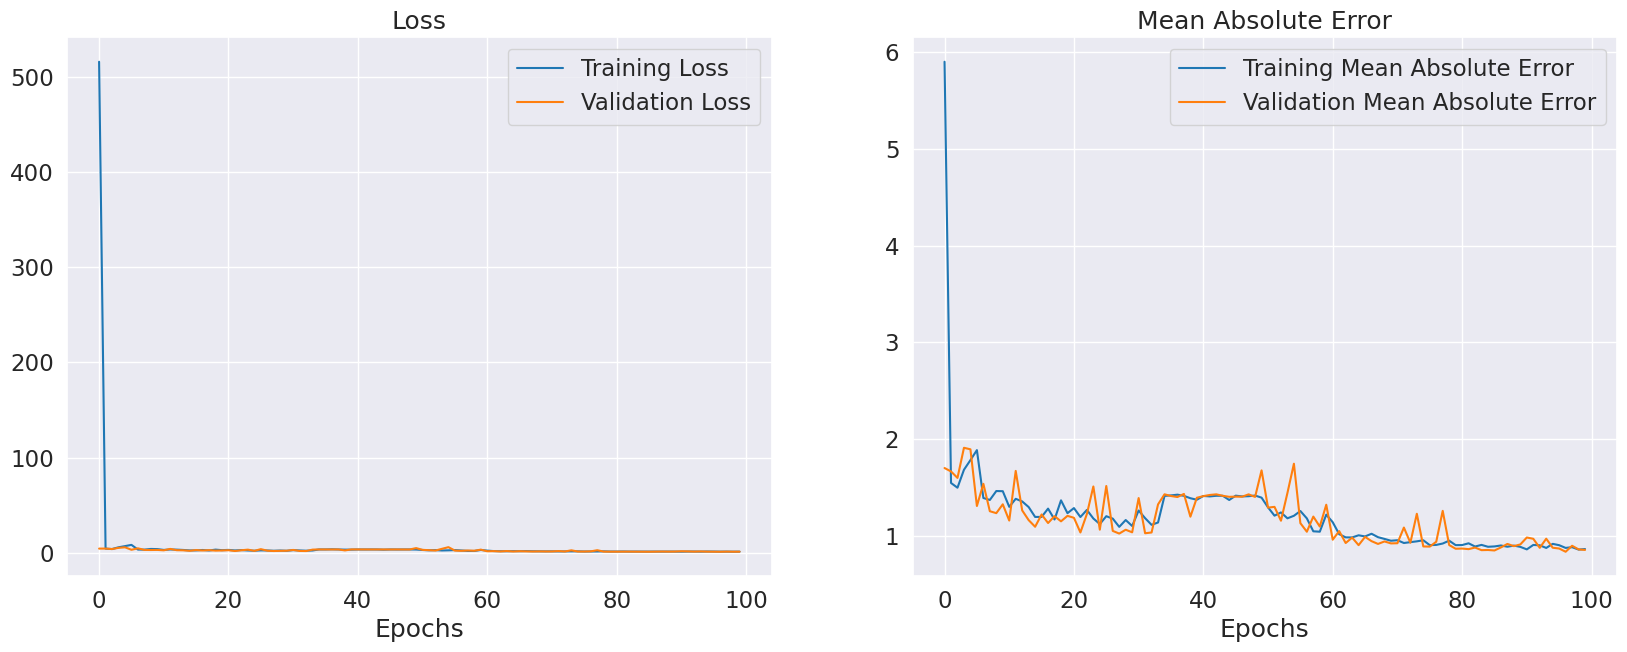

In [51]:
plot_loss_curves(history)

In [52]:
model.evaluate(X_test, y_test)


194/194 [==============================] - 0s 1ms/step - loss: 1.2676 - mae: 0.8198


[1.2675848007202148, 0.8197833895683289]